##Step 1: Data Collection and Preparation

####Step 1.1: Data Collection Access the Dataset

In [ ]:
import pandas as pd

df = pd.read_excel('/content/Online Retail.xlsx')

df.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


####Step 1.2: Data Inspection

In [ ]:
# Basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Check for missing values
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
duplicate_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [ ]:
df = df.drop_duplicates()

####Step 1.3: Data Cleaning Handle Missing Data

Depending on the nature of the missing data, we filled missing values with a default value, the mean/median, or drop rows/columns with missing data.
Normalize Data Types: Ensuring all data types are appropriate for the analysis. Convert data types if necessary (e.g., converting date strings to datetime objects).

In [ ]:
# Example of dropping rows with missing values
df.dropna(inplace=True)

In [ ]:
# Convert data types (e.g., converting string dates to datetime)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.InvoiceDate

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 401604, dtype: datetime64[ns]

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# Save the cleaned dataset to a CSV file
df.to_csv('cleaned_dataset.csv', index=False)  # `index=False` to avoid saving row indices


In [ ]:
# Save the cleaned dataset to an Excel file
df.to_excel('cleaned_dataset.xlsx', index=False)  # `index=False` to avoid saving row indices


####Step 1.4: Initial Exploration Explore Basic Statistics

The distribution of numeric columns, categorical data frequency, and any other key insights from the dataset.

Identify Outliers: Determining if there are extreme values that might need additional attention.

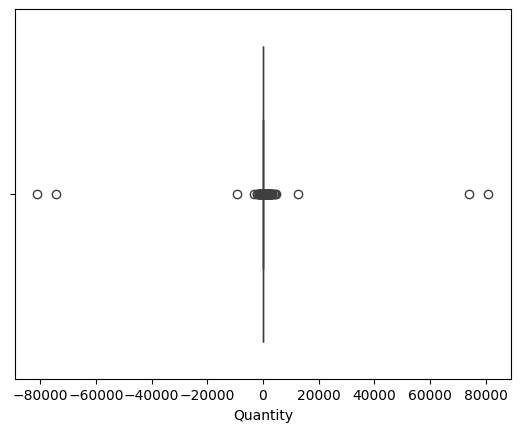

In [ ]:
# Basic statistics for numeric columns
df.describe()

# Frequency distribution for categorical data
df['Country'].value_counts()

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Quantity'])
plt.show()


1**.Checking for Non-String Data in 'InvoiceNo':**
Ensuring all values in InvoiceNo are strings. If some values are not strings, using .str methods (like .startswith()) can cause errors. Converting the entire column to a string type to avoid this issue.

In [ ]:
# Convert 'InvoiceNo' to string to ensure consistent data type
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

# Check if the conversion was successful
df['InvoiceNo'].dtype  # Should be 'object' or 'str'


dtype('O')

**2.Redefine the Operation Using Boolean Logic:**
Instead of relying on .str.startswith(), explicitly define the condition with boolean logic to ensure compatibility with NaN handling.

In [ ]:
# Create a mask for 'c'-prefixed entries
mask = df['InvoiceNo'].apply(lambda x: isinstance(x, str) and x.startswith('c'))

# Extract cancellation records
cancellations = df[mask]

# Remove cancellation records from the main dataframe
df_cleaned = df[~mask]


**3.Check for Spaces or Other Inconsistencies:**
If there are hidden spaces or non-printable characters in your data, it could lead to unexpected results. Clean the InvoiceNo column to remove such inconsistencies.

In [ ]:
# Strip leading and trailing spaces, then convert to lowercase
df['InvoiceNo'] = df['InvoiceNo'].str.strip().str.lower()

# Apply the condition again to identify 'c'-prefixed entries
mask = df['InvoiceNo'].str.startswith('c')

# Use the cleaned mask to filter data
cancellations = df[mask]
df_cleaned = df[~mask]


In the dataset, entries with a 'c'-prefixed InvoiceNo represent transaction cancellations. It's crucial to handle these carefully, as they can impact analysis by skewing results, especially when examining purchasing patterns or constructing a network based on transactions. Here's how we dealt with these cancellation entries:

**Identifying 'c'-Prefixed InvoiceNo Entries**:
First, identify all rows with 'c'-prefixed InvoiceNo values to understand their distribution and frequency.

In [ ]:
# Identify rows with 'c'-prefixed InvoiceNo
cancellations = df[df['InvoiceNo'].str.startswith('c')]

# Count the number of cancellations
num_cancellations = len(cancellations)

cancellations.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,c536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,c536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,c536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,c536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,c536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [ ]:
num_cancellations

8872

**Assessing Impact on Data**

Determine the impact of these cancellations on your dataset. This might include evaluating the percentage of cancellations relative to total transactions or identifying specific customers or products that are most affected.

In [ ]:
# Calculate the percentage of cancellations in the dataset
cancellation_rate = (num_cancellations / len(df)) * 100

# Determine which products are most frequently cancelled
product_cancellations = cancellations['StockCode'].value_counts()

# Determine which customers have the most cancellations
customer_cancellations = cancellations['CustomerID'].value_counts()


In [ ]:
cancellation_rate

2.209141343213713

*Bar Plot for Cancellation Rate*

A bar plot can visually represent the percentage of cancellations relative to the total dataset. This plot helps you understand how significant the cancellations are.

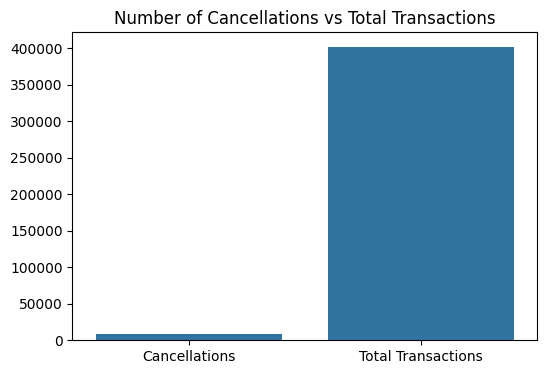

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the cancellation rate as a bar
plt.figure(figsize=(6, 4))
sns.barplot(x=['Cancellations', 'Total Transactions'], y=[num_cancellations, len(df)])
plt.title('Number of Cancellations vs Total Transactions')
plt.show()


*Bar Plot for Most Frequently Canceled Products*

This plot can show which products are most frequently cancelled. It's useful for identifying patterns in product returns or issues with specific items.

In [ ]:
product_cancellations

StockCode
22423     180
M         175
POST       97
22960      86
D          77
         ... 
22977       1
22195       1
85024C      1
85025C      1
23843       1
Name: count, Length: 1920, dtype: int64

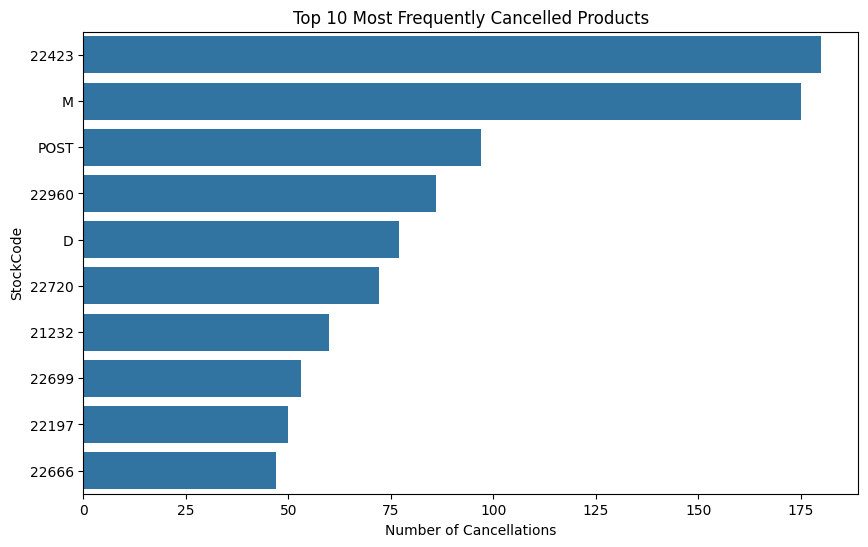

In [ ]:
# Top 10 most frequently cancelled products
top_cancelled_products = product_cancellations.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cancelled_products.values, y=top_cancelled_products.index)
plt.title('Top 10 Most Frequently Cancelled Products')
plt.xlabel('Number of Cancellations')
plt.show()


*Bar Plot for Customers with the Most Cancellations*

A bar plot can also illustrate which customers have the most cancellations, helping to identify those who frequently return items or cancel transactions.

In [ ]:
customer_cancellations

CustomerID
14911.0    226
17841.0    136
17511.0    113
15311.0    112
12607.0    101
          ... 
13199.0      1
15400.0      1
16814.0      1
13632.0      1
16446.0      1
Name: count, Length: 1589, dtype: int64

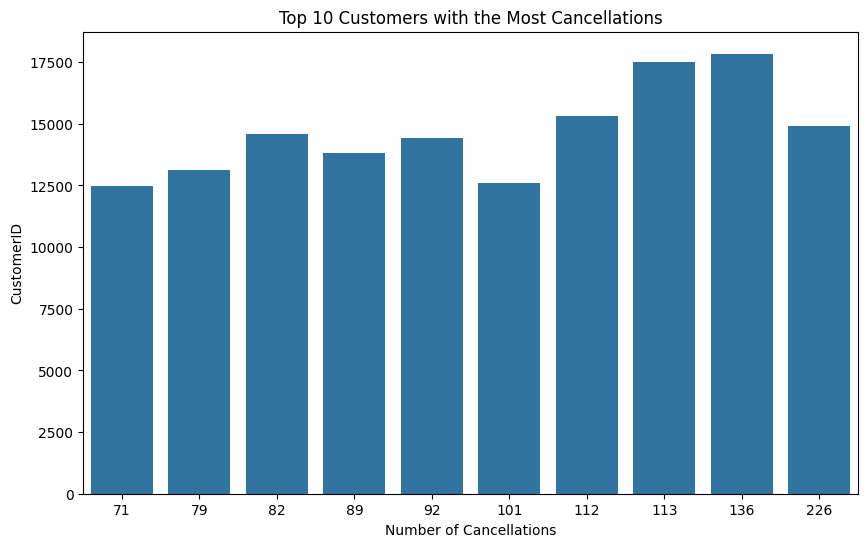

In [ ]:
# Top 10 customers with the most cancellations
top_customers_with_cancellations = customer_cancellations.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers_with_cancellations.values, y=top_customers_with_cancellations.index)
plt.title('Top 10 Customers with the Most Cancellations')
plt.xlabel('Number of Cancellations')
plt.show()


**Consider Removing Cancellations**

**Simplifying Network Representation:**
Cancellations might introduce noise into your network analysis, complicating the structure by adding unnecessary edges or nodes that don't represent actual purchases.

**Skewed Patterns:** Since cancellations are effectively reversed transactions, keeping them in your dataset could lead to skewed results when analyzing customer behavior or purchase trends.

**Focusing on Actual Transactions:** As the project aims to identify connections between customers and products based on actual purchases, removing cancellations is a cleaner approach.

In [ ]:
# Remove rows with 'c'-prefixed InvoiceNo from the primary dataset
df_2 = df[~df['InvoiceNo'].str.startswith('c')]


In [ ]:
#df_2.to_csv("cleaned_dataset_no_cancellations records.csv", index=False)

Remove records with "unspecified" values for the Country column

**Step 1: Identify Rows with "Unspecified" Country**
Identify all rows where the Country column has the value "unspecified."

In [ ]:
# Find rows with "unspecified" in the Country column
unspecified_countries = df[df['Country'].str.lower() == 'unspecified']

# Count the number of rows with "unspecified" country
num_unspecified = len(unspecified_countries)

# Display the first few rows to confirm the result
unspecified_countries.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
152712,549687,20685,DOORMAT RED RETROSPOT,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152713,549687,22691,DOORMAT WELCOME SUNRISE,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152714,549687,48116,DOORMAT MULTICOLOUR STRIPE,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152715,549687,21213,PACK OF 72 SKULL CAKE CASES,24,2011-04-11 13:29:00,0.55,12363.0,Unspecified
152716,549687,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2011-04-11 13:29:00,0.55,12363.0,Unspecified


**Step 2: Remove Rows with "Unspecified" Country**
After identifying these rows, you can remove them from the dataset to ensure cleaner data for network analysis.

In [ ]:
# Create a cleaned dataset by excluding rows with "unspecified" in the Country column
df_final_clean = df[df['Country'].str.lower() != 'unspecified']


**Step 3: Confirm Removal and Validate Dataset**
After removing the "unspecified" records, ensure that the dataset still has a sufficient number of valid entries for your analysis. Check the new shape of the dataset to confirm that the removal worked as expected.

In [ ]:
# Check the new shape of the cleaned dataset
df_final_clean.shape

# Re-inspect the unique values in the Country column
df_final_clean['Country'].unique()


array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Brazil', 'USA', 'European Community', 'Bahrain', 'Malta', 'RSA'],
      dtype=object)

Downloading the dataset with no cancellation records and no unspecified country variable

In [ ]:
df_final_clean.to_csv("final_clean.csv", index=False)

**HERE**, The cleaned dataset, we can proceed with the rest of the project, confident that we're working with more accurate and meaningful data. Since we're focusing on constructing a network representation and potentially using Country to identify communities, this step ensures we avoid confusion and maintain data quality.

##Step 2: Data Sampling

Given the project focus on network analysis and machine learning, stratified sampling is likely the best choice. It ensures that we have a balanced representation of key attributes, reducing the risk of data bias and ensuring meaningful network structures. This method maintains the diversity and relationships in the dataset, which is crucial for building networks and making accurate predictions.

Random sampling could also be used, but stratified sampling is generally preferred when we have significant subgroups that should be proportionally represented. Cluster sampling might be useful if you want to maintain relationships within specific groups, but it may lead to larger samples depending on the number and size of clusters selected.

Stratified sampling is an effective way to reduce a dataset's size while preserving the proportions of specific groups or categories. This method ensures that the reduced dataset maintains key characteristics and remains representative of the original data. In our case, given that the dataset has a large number of rows, stratified sampling can be a good way to ensure that important subsets of data aren't lost when reducing the size of the dataset.

Here's how to perform stratified sampling on your dataset:

**Identify Stratification Criteria**

Determined the key variable(s) we want to maintain in your sample. For example, we might stratify by:

* Country: To ensure proportional representation of customers from different countries.
* CustomerID: To maintain a consistent distribution of customers.

**Determine Sampling Fraction**

Choose a sampling fraction that achieves the desired dataset size. For example, we want to reduce the dataset by 90%, use a sampling fraction of 0.1 (10%).

Perform Stratified Sampling
Using Python and pandas, we performed stratified sampling as follows

In [ ]:
import pandas as pd

df = pd.read_csv("/content/final_clean.csv")

# Set the stratification criteria and the sampling fraction
stratification_criteria = 'Country'
sampling_fraction = 0.1

# Perform stratified sampling
sampled_df = df.groupby(stratification_criteria, group_keys=False).apply(
    lambda x: x.sample(frac=sampling_fraction, random_state=42)
)

sampled_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 40140 entries, 161649 to 63001
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    40140 non-null  object 
 1   StockCode    40140 non-null  object 
 2   Description  40140 non-null  object 
 3   Quantity     40140 non-null  int64  
 4   InvoiceDate  40140 non-null  object 
 5   UnitPrice    40140 non-null  float64
 6   CustomerID   40140 non-null  float64
 7   Country      40140 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.8+ MB


**Validate the Sample**

After performing stratified sampling, ensure that the sampled dataset retains the desired characteristics of the original dataset. Checked if the distribution of stratification criteria is similar to the original dataset:

<Axes: title={'center': 'Comparison of Distributions'}, xlabel='Country'>

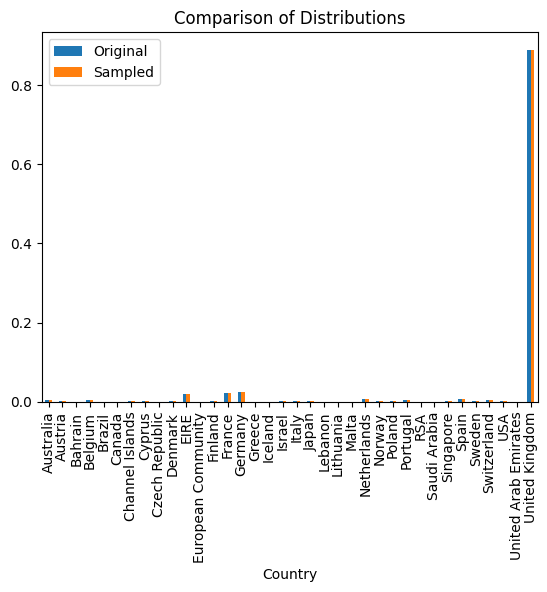

In [ ]:
# Compare the distribution of the stratification criteria in the original and sampled datasets
original_distribution = df[stratification_criteria].value_counts(normalize=True)
sampled_distribution = sampled_df[stratification_criteria].value_counts(normalize=True)

comparison_df = pd.DataFrame({
    'Original': original_distribution,
    'Sampled': sampled_distribution
})
comparison_df.plot(kind='bar', title='Comparison of Distributions')


-----------------This comparison helps ensure that your sampled dataset maintains the same general characteristics as the original data, which is key for a representative analysis.--------

-----Documentation and Reproducibility
To ensure reproducibility and provide context for your project, document your stratified sampling approach, including the chosen criteria, sampling fraction, and any assumptions made during the process. Setting a random seed (random_state) helps guarantee consistent results when re-running the code. This is particularly useful when presenting your project or when others need to reproduce your results.----

## Step 3: Data Transformation and Network Construction

Creating a customer-centric network involves building a network where nodes represent customers and edges represent relationships between them, such as shared product purchases or co-occurrences in transactions. This network structure helps understand connections among customers based on their purchasing behaviors.


####Step 3.1: Identify Relationships to Create Edges

To build a customer-centric network, you need to determine how to define connections (edges) between customers. The most common approach is to create edges based on shared product purchases or co-occurrences in transactions.

* Shared Product Purchases: Customers are connected if they have purchased the same product.
* Transaction Co-occurrences: Customers are connected if they appeared in the same transaction. For simplicity, let's focus on shared product purchases to create edges.

For simplicity, we focused on shared product purchases to create edges.

####Step 3.2: Construct the Network

Use a library like NetworkX in Python to build the customer-centric network. Added nodes for each unique customer and create edges based on shared products.

In [ ]:
import networkx as nx
import pandas as pd

G = nx.Graph()

# Add nodes for each unique customer
unique_customers = sampled_df['CustomerID'].unique()
for customer in unique_customers:
    G.add_node(customer)

# Create edges based on shared product purchases
# Iterate through the dataset to find customers who bought the same product
customer_product_dict = {}

# Build a dictionary of products with their corresponding customers
for idx, row in sampled_df.iterrows():
    product = row['StockCode']
    customer = row['CustomerID']

    if product not in customer_product_dict:
        customer_product_dict[product] = set()

    customer_product_dict[product].add(customer)

# Create edges between customers who purchased the same product
for product, customers in customer_product_dict.items():
    customer_list = list(customers)
    # Connect all pairs of customers who bought the same product
    for i in range(len(customer_list)):
        for j in range(i + 1, len(customer_list)):
            G.add_edge(customer_list[i], customer_list[j])


####Step 3.3: Visualize the Network

To export the network data to files suitable for Gephi, we'll need to create two separate files: one for nodes and one for edges. In Gephi, nodes represent the entities in the network (in this case, customers), while edges represent the connections between them. By exporting these files, we can import them into Gephi to visualize the network.

Here's how to create the nodes and edges files from your NetworkX graph in a way that can be imported into Gephi:

Exporting Nodes and Edges for Gephi
1. Export Nodes to CSV:
Create a CSV file containing node attributes. Include at least a unique identifier for each node and any additional attributes we want to use in Gephi (like labels, types, etc.).
2. Export Edges to CSV:
Create a CSV file representing the connections (edges) between nodes. Include source and target node identifiers, and any additional attributes like edge weight or type.

In [ ]:
import pandas as pd
import networkx as nx

# Step 1: Export Nodes
nodes_data = []
for node in G.nodes():
    node_info = {
        'id': node,
        'label': str(node),
    }
    nodes_data.append(node_info)

nodes_df = pd.DataFrame(nodes_data)

nodes_df.to_csv('gephi_nodes.csv', index=False)


# Step 2: Export Edges
edges_data = []
for edge in G.edges(data=True):
    edge_info = {
        'source': edge[0],
        'target': edge[1],
    }
    # If edges have attributes like 'weight', include them
    edges_data.append(edge_info)

# Create a DataFrame for edges
edges_df = pd.DataFrame(edges_data)

# Save edges to CSV
edges_df.to_csv('gephi_edges.csv', index=False)  # Save with no index column


Resultant network from the Gephi

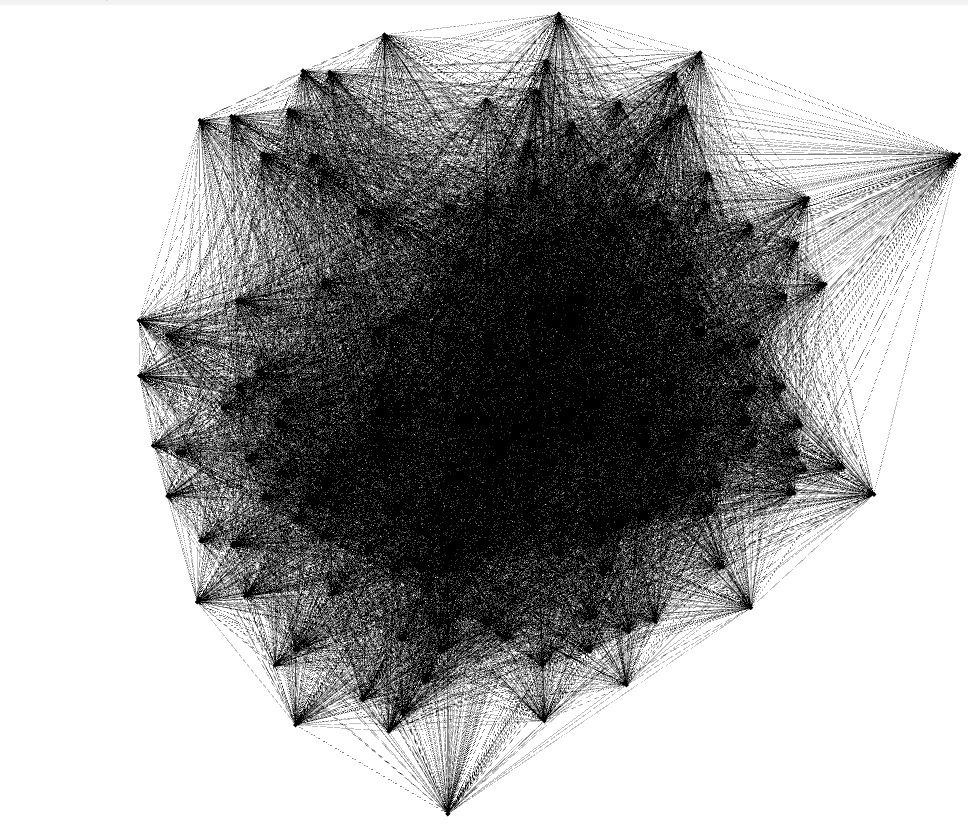



####Step 3.4: Network Measures

We were able to calculate the Network Measures from the Software Gephi. Here are the results,

Clustering Coefficient:


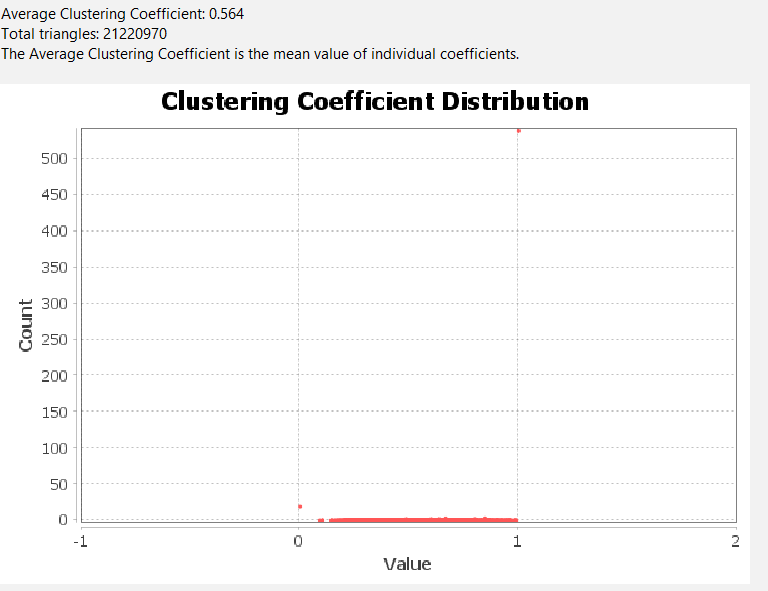


Degree Distribution:


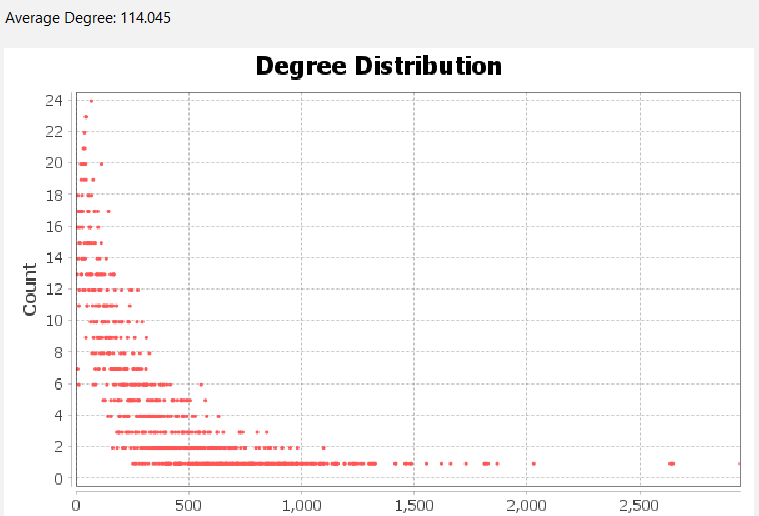

Betweenness Centrality:


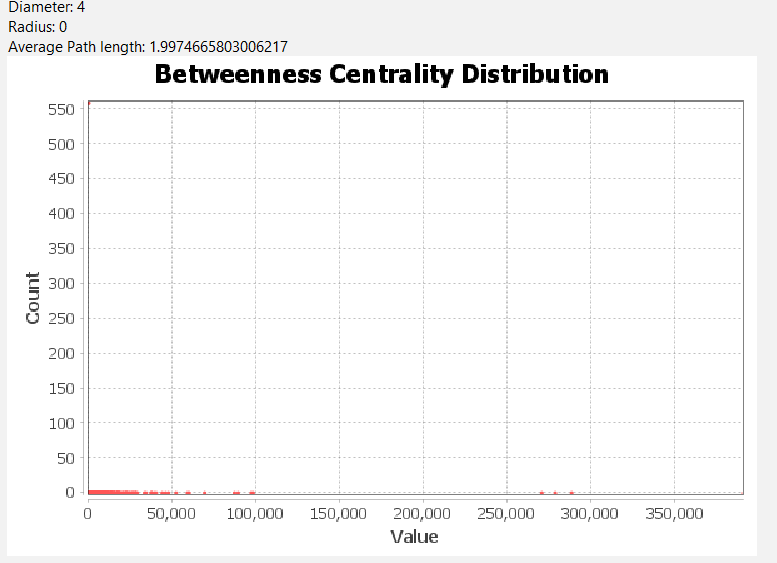

Closeness Centrality:

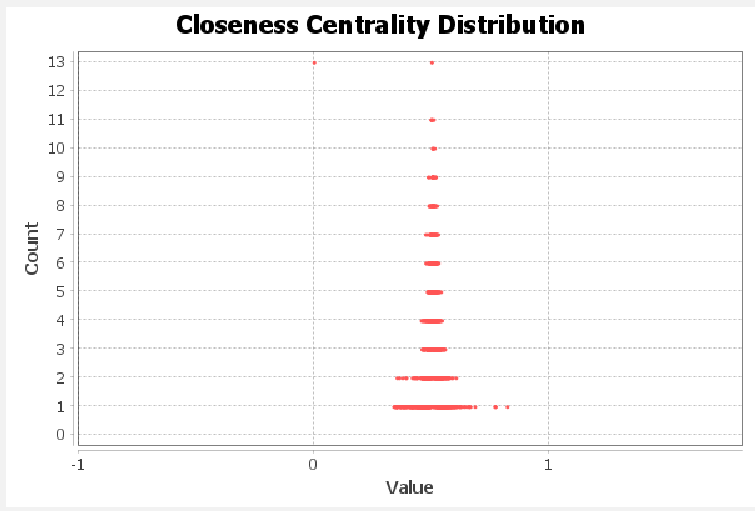

####Step 3.5: Subgraph Analysis

We were successfully able to covert the directly non inherent network dataset into network oriented and executed the network using Gephi. The resultant is so dense due to the vast number of nodes and edges even of sampling the dataset. The network is exceptionally large, even with any of the optimizations, it was taking time to visualize. For project purposes, we are considering the segements in the subgraph to understand the nature of the graoh. For that, to create a meaningful subgraph with fewer nodes and edges, it's crucial to identify and focus on specific subsets of the original graph. Given the unexpectedly high edge count in the subgraph, let's ensure you're correctly filtering out extra edges.

There are several reasons we might encounter an unexpectedly large number of edges in a subgraph:

* Improper Edge Filtering: Unintentionally including all possible edges instead of selectively reducing them.
* Edge Duplication: Incorrect logic causing multiple entries of the same edge.
* Excessive Edge Density: Nodes having connections with too many others.

Let's focus on a simple way to create a smaller subgraph with fewer edges by randomly sampling nodes and constructing a new subgraph based on this sample.


**Random Node Sampling to Create a Smaller Subgraph**

By sampling a subset of nodes and constructing a subgraph, we can reduce the number of edges and nodes, making the network more manageable.

Note here that every time we run this subgraph generation it gives us random number of nodes and edges since it is random picking of subgraph that resembles the similar nature of the whole network.

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np

# We sample 5% of the nodes
num_nodes = G.number_of_nodes()
sample_fraction = 0.05  # Adjust this fraction to get desired subgraph size

# Randomly sample a subset of nodes
sampled_nodes = np.random.choice(G.nodes(), int(num_nodes * sample_fraction), replace=False)

# Create a subgraph from the sampled nodes
G_subgraph = G.subgraph(sampled_nodes).copy()

print("Number of nodes in the subgraph:", G_subgraph.number_of_nodes())
print("Number of edges in the subgraph:", G_subgraph.number_of_edges())


Number of nodes in the subgraph: 190
Number of edges in the subgraph: 922


**Re-Exporting Nodes and Edges for Gephi**

After creating the subgraph from a random sampling of nodes, export the data for Gephi, ensuring there's no edge duplication.

In [ ]:
# Step 1: Export Subgraph Nodes with Labels
nodes_data = []
for node in G_subgraph.nodes():
    node_info = {
        'id': node,
        'label': str(node),  # Label for Gephi
    }
    nodes_data.append(node_info)

nodes_df = pd.DataFrame(nodes_data)
nodes_df.to_csv('smaller_gephi_nodes.csv', index=False)


# Step 2: Export Subgraph Edges
edges_data = []
unique_edges = set()  # Ensure unique edges

for edge in G_subgraph.edges(data=True):
    source, target = sorted([edge[0], edge[1]])  # Sort to ensure unique order
    edge_info = {
        'source': source,
        'target': target,
        'weight': edge[2].get('weight', 1),  # Edge weight
    }

    if (source, target) not in unique_edges:
        unique_edges.add((source, target))
        edges_data.append(edge_info)

edges_df = pd.DataFrame(edges_data)
edges_df.to_csv('smaller_gephi_edges.csv', index=False)


**Validate Subgraph Edge Count**

To ensure there's no edge duplication or unexpected increase in edge count, check the unique edge count against the total edge count in the subgraph.

In [ ]:
# Load the exported edges to verify
edges_df = pd.read_csv('smaller_gephi_edges.csv')

# Check for unique edges
unique_edge_pairs = set(edges_df[['source', 'target']].apply(tuple, axis=1))

# Compare unique edges to total edges in the subgraph
print("Unique edges:", len(unique_edge_pairs))
print("Total edges in the subgraph:", len(edges_df))


Unique edges: 922
Total edges in the subgraph: 922


---------This approach aims to create a smaller subgraph with a controlled number of nodes and edges. If the edge count is still unexpectedly high, consider reducing the sample fraction or limiting nodes with excessively high degrees. This method should help achieve a manageable subgraph for visualization and community detection in Gephi.-------------

#####Subgraph network from Gephi


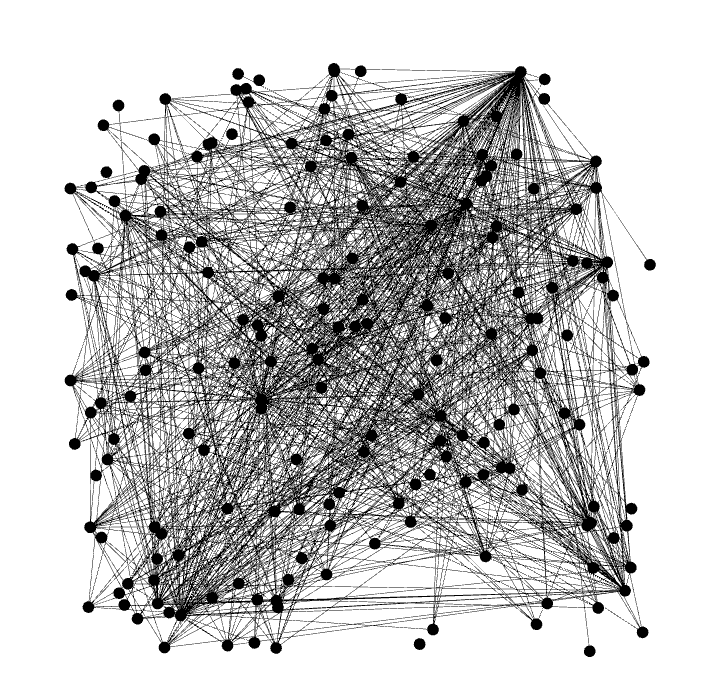

#####Subgraph network measures calculated from Gephi:

Degree Distribution:

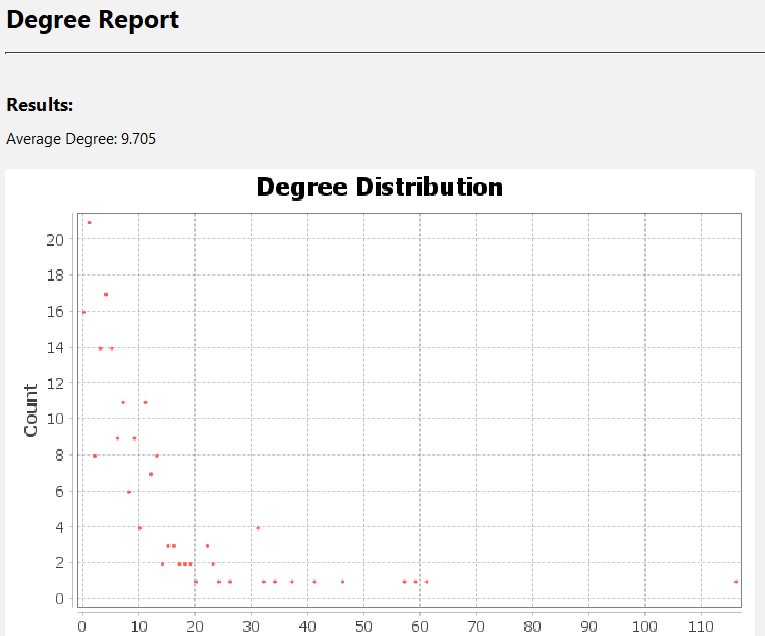

Betweenness Centrality

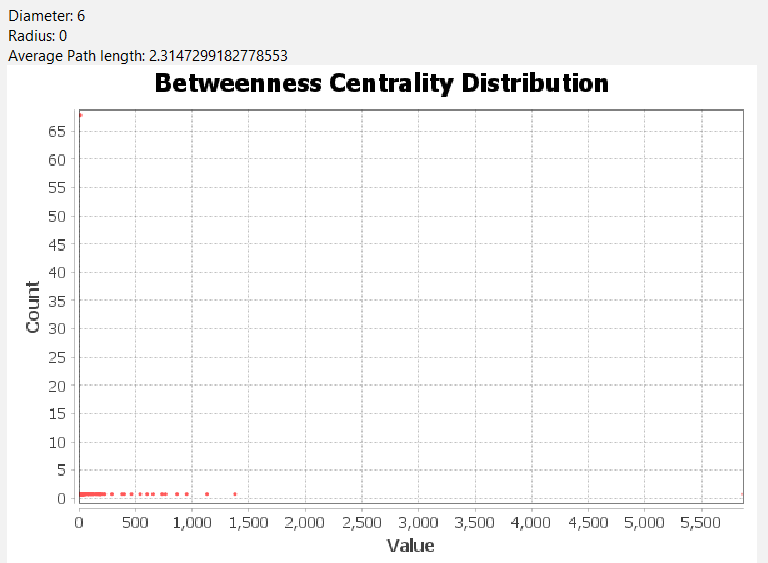

Closeness Centrality

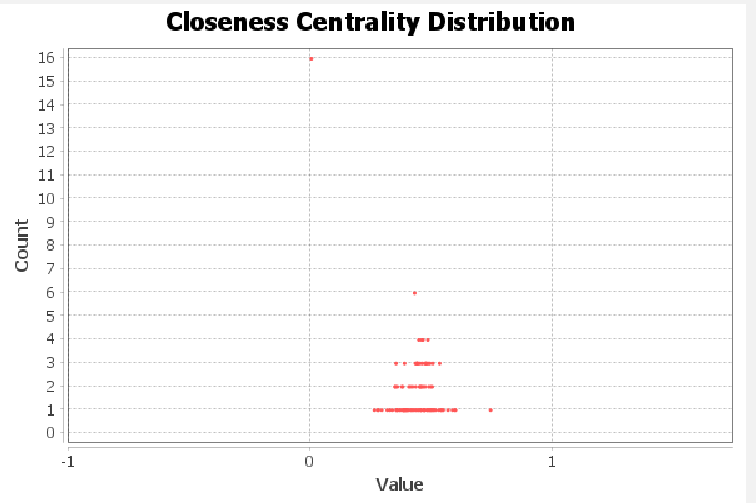

Average Clustering Coefficient-Notice that it is similar to the original Network

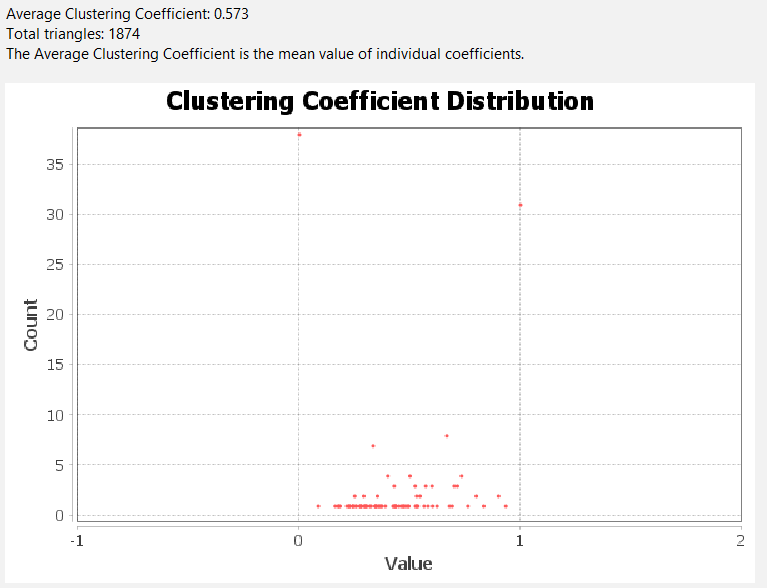

##Step 4: Communities Detection in subgraph using Gephi

Gephi also detects the communities in the network since it is one of its feature. Firstly it calculates the Modulairty from the Statistics and gives options us to Overview the Communities in the Network using filters available in the Gephi. Here is the resultant network from the Gephi with the communities highlighted in it.

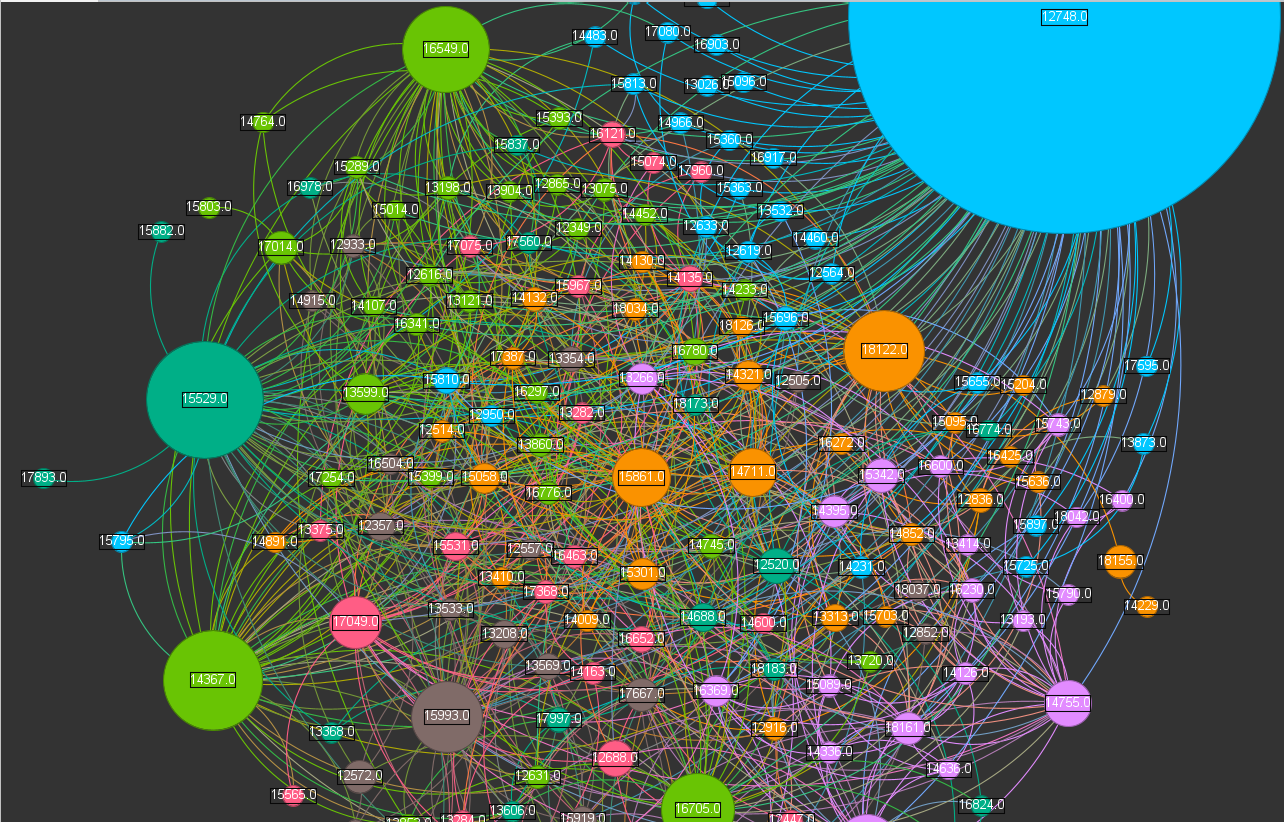

##Step 5: Data Mining and Machine Learning

####Step.5.1: Identifying Influential Customers

Identify key customers based on network metrics like degree or weighted degree. This analysis can help us understand which customers have a significant impact on the network or are likely to influence other customers.

In [ ]:
import networkx as nx
import pandas as pd

# Calculate degree for each customer
degree_dict = dict(nx.degree(G_subgraph))

# Ensure all edges in the existing graph have a 'weight' attribute
for edge in G_subgraph.edges(data=True):
    if 'weight' not in edge[2]:
        edge[2]['weight'] = 1  # Set a default weight if missing

# Calculate weighted degree for each customer
weighted_degree_dict = {node: sum(data['weight'] for _, _, data in G_subgraph.edges(node, data=True)) for node in G_subgraph.nodes()}

# Create a DataFrame for customer features
customer_features = pd.DataFrame({
    'CustomerID': list(degree_dict.keys()),
    'Degree': list(degree_dict.values()),
    'WeightedDegree': list(weighted_degree_dict.values())
})


In [ ]:
# Find the top customers by degree
top_customers = customer_features.nlargest(10, 'Degree')  # Top 10 customers by degree

# Find the top customers by weighted degree
top_weighted_customers = customer_features.nlargest(10, 'WeightedDegree')  # Top 10 customers by weighted degree

print("Top 10 customers by degree:\n", top_customers)
print("Top 10 customers by weighted degree:\n", top_weighted_customers)


Top 10 customers by degree:
      CustomerID  Degree  WeightedDegree
176     12748.0     116             116
69      15529.0      61              61
12      14367.0      59              59
67      16549.0      57              57
189     15861.0      46              46
56      15993.0      41              41
123     16705.0      37              37
77      18122.0      34              34
165     14755.0      32              32
26      14388.0      31              31
Top 10 customers by weighted degree:
      CustomerID  Degree  WeightedDegree
176     12748.0     116             116
69      15529.0      61              61
12      14367.0      59              59
67      16549.0      57              57
189     15861.0      46              46
56      15993.0      41              41
123     16705.0      37              37
77      18122.0      34              34
165     14755.0      32              32
26      14388.0      31              31
